In [ ]:
import fastf1
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#enable caching for better performance
cache_path = r'D:\f1-prediction-ml-2025-zoe\cache'
if not os.path.exists(cache_path):
    os.makedirs(cache_path)
fastf1.Cache.enable_cache(cache_path)

print("All packages imported successfully.")

All packages imported successfully.


In [5]:
print("Testing F1 connection...")

try: 
    race = fastf1.get_session(2024, 'Bahrain', 'R')
    race.load()
    print("Connection successful.")
    #print(f"Drivers in the race: {race.drivers}")
    #print(f"Weather data: {race.weather_data}")
    #print(f"Status: {race.session_status}, {race.track_status}")
    print(f"Race: {race.event['EventName']} {race.event['EventDate'].year}")
    print(f"Weather: {race.weather_data is not None}")
    print(f"Number of drivers: {len(race.results)}")
except Exception as e:
    print(f"Error: {e}")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...


Testing F1 connection...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


Connection successful.
Race: Bahrain Grand Prix 2024
Weather: True
Number of drivers: 20


In [7]:
#explore race results structure
print("Race results structure:")
print(race.results.head())
print(race.results.columns.tolist())
print(race.results.columns)
print(race.results.dtypes)
print("Sample race results data:")
display(race.results[['FullName', 'Abbreviation', 'TeamName', 'GridPosition', 'Position', 'Status', 'Points']].head(10))

Race results structure:
   DriverNumber BroadcastName Abbreviation        DriverId         TeamName  \
1             1  M VERSTAPPEN          VER  max_verstappen  Red Bull Racing   
11           11       S PEREZ          PER           perez  Red Bull Racing   
55           55       C SAINZ          SAI           sainz          Ferrari   
16           16     C LECLERC          LEC         leclerc          Ferrari   
63           63     G RUSSELL          RUS         russell         Mercedes   

   TeamColor    TeamId FirstName    LastName         FullName  ... Position  \
1     3671c6  red_bull       Max  Verstappen   Max Verstappen  ...      1.0   
11    3671c6  red_bull    Sergio       Perez     Sergio Perez  ...      2.0   
55    e8002d   ferrari    Carlos       Sainz     Carlos Sainz  ...      3.0   
16    e8002d   ferrari   Charles     Leclerc  Charles Leclerc  ...      4.0   
63    27f4d2  mercedes    George     Russell   George Russell  ...      5.0   

   ClassifiedPosition  Gri

,FullName,Abbreviation,TeamName,GridPosition,Position,Status,Points
1,Max Verstappen,VER,Red Bull Racing,1.0,1.0,Finished,26.0
11,Sergio Perez,PER,Red Bull Racing,5.0,2.0,Finished,18.0
55,Carlos Sainz,SAI,Ferrari,4.0,3.0,Finished,15.0
16,Charles Leclerc,LEC,Ferrari,2.0,4.0,Finished,12.0
63,George Russell,RUS,Mercedes,3.0,5.0,Finished,10.0
4,Lando Norris,NOR,McLaren,7.0,6.0,Finished,8.0
44,Lewis Hamilton,HAM,Mercedes,9.0,7.0,Finished,6.0
81,Oscar Piastri,PIA,McLaren,8.0,8.0,Finished,4.0
14,Fernando Alonso,ALO,Aston Martin,6.0,9.0,Finished,2.0
18,Lance Stroll,STR,Aston Martin,12.0,10.0,Finished,1.0


In [8]:
#test quali data
quali = fastf1.get_session(2024, 'Bahrain', 'Q')
quali.load()

print("Qualifying results structure:")
print(quali.results.head())
print(quali.results.columns.tolist())
print("\nSample qualifying results data:")
display(quali.results[['FullName', 'Abbreviation', 'Q1', 'Q2', 'Q3', 'Position']].head(10))

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	No cached data found for session_status_data. Loading data

Qualifying results structure:
   DriverNumber BroadcastName Abbreviation        DriverId         TeamName  \
1             1  M VERSTAPPEN          VER  max_verstappen  Red Bull Racing   
16           16     C LECLERC          LEC         leclerc          Ferrari   
63           63     G RUSSELL          RUS         russell         Mercedes   
55           55       C SAINZ          SAI           sainz          Ferrari   
11           11       S PEREZ          PER           perez  Red Bull Racing   

   TeamColor    TeamId FirstName    LastName         FullName  ... Position  \
1     3671c6  red_bull       Max  Verstappen   Max Verstappen  ...      1.0   
16    e8002d   ferrari   Charles     Leclerc  Charles Leclerc  ...      2.0   
63    27f4d2  mercedes    George     Russell   George Russell  ...      3.0   
55    e8002d   ferrari    Carlos       Sainz     Carlos Sainz  ...      4.0   
11    3671c6  red_bull    Sergio       Perez     Sergio Perez  ...      5.0   

   ClassifiedPositio

,FullName,Abbreviation,Q1,Q2,Q3,Position
1,Max Verstappen,VER,0 days 00:01:30.031000,0 days 00:01:29.374000,0 days 00:01:29.179000,1.0
16,Charles Leclerc,LEC,0 days 00:01:30.243000,0 days 00:01:29.165000,0 days 00:01:29.407000,2.0
63,George Russell,RUS,0 days 00:01:30.350000,0 days 00:01:29.922000,0 days 00:01:29.485000,3.0
55,Carlos Sainz,SAI,0 days 00:01:29.909000,0 days 00:01:29.573000,0 days 00:01:29.507000,4.0
11,Sergio Perez,PER,0 days 00:01:30.221000,0 days 00:01:29.932000,0 days 00:01:29.537000,5.0
14,Fernando Alonso,ALO,0 days 00:01:30.179000,0 days 00:01:29.801000,0 days 00:01:29.542000,6.0
4,Lando Norris,NOR,0 days 00:01:30.143000,0 days 00:01:29.941000,0 days 00:01:29.614000,7.0
81,Oscar Piastri,PIA,0 days 00:01:30.531000,0 days 00:01:30.122000,0 days 00:01:29.683000,8.0
44,Lewis Hamilton,HAM,0 days 00:01:30.451000,0 days 00:01:29.718000,0 days 00:01:29.710000,9.0
27,Nico Hulkenberg,HUL,0 days 00:01:30.566000,0 days 00:01:29.851000,0 days 00:01:30.502000,10.0


Weather data available:
['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']
Weather data points: 157


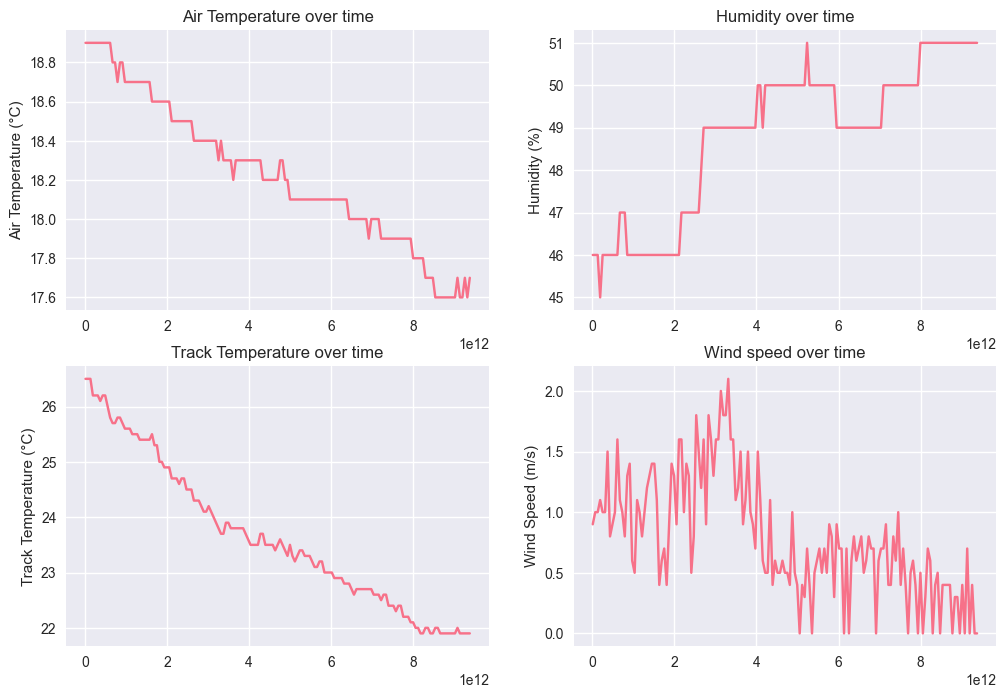

In [11]:
#explore weather data
if race.weather_data is not None and not race.weather_data.empty:
    print("Weather data available:")
    print(race.weather_data.columns.tolist())
    print(f"Weather data points: {len(race.weather_data)}")

    fig, axes = plt.subplots(2, 2, figsize=(12,8))

    axes[0, 0].plot(race.weather_data['Time'], race.weather_data['AirTemp'])
    axes[0, 0].set_title('Air Temperature over time')
    axes[0, 0].set_ylabel('Air Temperature (°C)')

    axes[0, 1].plot(race.weather_data['Time'], race.weather_data['Humidity'])
    axes[0, 1].set_title('Humidity over time')
    axes[0, 1].set_ylabel('Humidity (%)')

    axes[1, 0].plot(race.weather_data['Time'], race.weather_data['TrackTemp'])
    axes[1, 0].set_title('Track Temperature over time')
    axes[1, 0].set_ylabel('Track Temperature (°C)')

    axes[1, 1].plot(race.weather_data['Time'], race.weather_data['WindSpeed'])
    axes[1, 1].set_title('Wind speed over time')
    axes[1, 1].set_ylabel('Wind Speed (m/s)')

    plt.show()
else:
    print("No weather data available for this session")

In [14]:
## Cell 7: Explore Multiple Races for Pattern Recognition
print("Testing data collection across multiple races...")

# Get 2024 season schedule
schedule_2024 = fastf1.get_event_schedule(2024)
print(f"2024 season has {len(schedule_2024)} events")

# Show first few races
display(schedule_2024[['RoundNumber', 'EventName', 'EventDate', 'EventFormat']])

Testing data collection across multiple races...
2024 season has 25 events


,RoundNumber,EventName,EventDate,EventFormat
0,0,Pre-Season Testing,2024-02-23,testing
1,1,Bahrain Grand Prix,2024-03-02,conventional
2,2,Saudi Arabian Grand Prix,2024-03-09,conventional
3,3,Australian Grand Prix,2024-03-24,conventional
4,4,Japanese Grand Prix,2024-04-07,conventional
5,5,Chinese Grand Prix,2024-04-21,sprint_qualifying
6,6,Miami Grand Prix,2024-05-05,sprint_qualifying
7,7,Emilia Romagna Grand Prix,2024-05-19,conventional
8,8,Monaco Grand Prix,2024-05-26,conventional
9,9,Canadian Grand Prix,2024-06-09,conventional


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]


Testing single race data collection...


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached 

Single race data collection successful!


,driver,team,qualifying_position,finishing_position,grid_position,points
0,VER,Red Bull Racing,1.0,1.0,1.0,26.0
1,PER,Red Bull Racing,5.0,2.0,5.0,18.0
2,SAI,Ferrari,4.0,3.0,4.0,15.0
3,LEC,Ferrari,2.0,4.0,2.0,12.0
4,RUS,Mercedes,3.0,5.0,3.0,10.0
5,NOR,McLaren,7.0,6.0,7.0,8.0
6,HAM,Mercedes,9.0,7.0,9.0,6.0
7,PIA,McLaren,8.0,8.0,8.0,4.0
8,ALO,Aston Martin,6.0,9.0,6.0,2.0
9,STR,Aston Martin,12.0,10.0,12.0,1.0


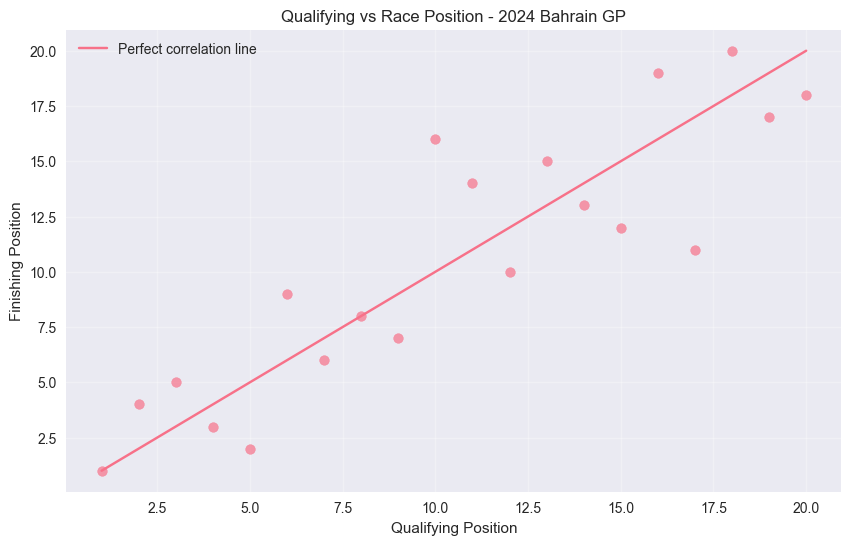

Qualifying-Race correlation: 0.886
Correlation matrix:
                     qualifying_position  finishing_position
qualifying_position             1.000000            0.885714
finishing_position              0.885714            1.000000


In [22]:
def collect_single_race_data(year, event_name):
    """Test function to collect data for a single race"""
    try:
        # Load race and qualifying sessions
        race = fastf1.get_session(year, event_name, 'R')
        race.load()
        qualifying = fastf1.get_session(year, event_name, 'Q')
        qualifying.load()
        
        race_data = []
        
        for idx, driver_result in race.results.iterrows():
            driver_code = driver_result['Abbreviation']
            
            if pd.isna(driver_code):
                continue
            
            # Get qualifying position
            qual_result = qualifying.results[qualifying.results['Abbreviation'] == driver_code]
            qual_pos = qual_result.iloc[0]['Position'] if not qual_result.empty else 20
            
            # Get finishing position
            finish_pos = driver_result['Position']
            if pd.isna(finish_pos):
                finish_pos = 21  # DNF
            
            race_data.append({
                'driver': driver_code,
                'team': driver_result['TeamName'],
                'qualifying_position': qual_pos,
                'finishing_position': finish_pos,
                'grid_position': driver_result['GridPosition'],
                'points': driver_result['Points']
            })
        
        return pd.DataFrame(race_data)
        
    except Exception as e:
        print(f"Error collecting data for {event_name}: {e}")
        return pd.DataFrame()

# Test on Bahrain 2024
print("Testing single race data collection...")
bahrain_data = collect_single_race_data(2024, 'Bahrain')
if not bahrain_data.empty:
    print("Single race data collection successful!")
    display(bahrain_data)
    
    # Quick analysis
    plt.figure(figsize=(10, 6))
    plt.scatter(bahrain_data['qualifying_position'], bahrain_data['finishing_position'], alpha=0.7)
    plt.plot([1, 20], [1, 20], label='Perfect correlation line')
    plt.xlabel('Qualifying Position')
    plt.ylabel('Finishing Position')
    plt.title('Qualifying vs Race Position - 2024 Bahrain GP')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Correlation
    correlation = bahrain_data['qualifying_position'].corr(bahrain_data['finishing_position'])
    print(f"Qualifying-Race correlation: {correlation:.3f}")
    # Correlation matrix
    print("Correlation matrix:")
    print(bahrain_data[['qualifying_position', 'finishing_position']].corr())
else:
    print("Failed to collect race data")